## Final Project Submission

Please fill out:
* Student name: Kinoti Martin Mwenda
* Student pace: Full-time
* Scheduled project review date/time: March 13th
* Instructor name: William Okomba
* Blog post URL:


## Loading Data

In [13]:
# Your code here - remember to use markdown cells for comments as well!

# Importing relevant libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## IMDB Dataset

In [76]:
# IMDB data stored in the database
# SQLite connection to database
conn = sqlite3.Connection("./im.db")
conn

In [77]:
# Example: Persons table 
q = """
        SELECT*
        FROM principals
        ;"""
pd.read_sql(q, conn).head(10)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,None,None
9,tt0323808,6,nm0811056,producer,producer,None


In [16]:
# Accessing movie_ratings table
q = """SELECT*
        FROM movie_ratings
        ;"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [17]:
# Accessing movie_basics table
q = """SELECT*
        FROM movie_basics
        ;"""
pd.read_sql(q, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
# Joining relevant tables
# Joining persons table with principals table using the person_id
person_data = """SELECT movie_id,
                        person_id,
                        primary_name,
                        primary_profession,
                        category
                FROM persons
                JOIN principals
                        USING(person_id)
                ;"""
pd.read_sql(person_data, conn).head(10)

,movie_id,person_id,primary_name,primary_profession,category
0,tt2398241,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",producer
1,tt0433397,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer
2,tt1681372,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer
3,tt2281215,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer
4,tt2387710,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer
5,tt2749258,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer
6,tt3564200,nm0061865,Joseph Bauer,"composer,music_department,sound_department",composer
7,tt6463956,nm0062070,Bruce Baum,"miscellaneous,actor,writer",actor
8,tt2547632,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department",cinematographer
9,tt7697870,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department",cinematographer


In [19]:
# Joining movie_basics and movie_ratings
# Best movies based on the rating
movie_data = """SELECT movie_id,
                        primary_title AS title, 
                        genres,
                        averagerating AS average_rating
                FROM movie_basics
                JOIN movie_ratings
                    USING (movie_id)
                WHERE average_rating BETWEEN 9.8 AND 9.9
                ORDER BY average_rating DESC
                ;"""
pd.read_sql(movie_data, conn).head(5)


,movie_id,title,genres,average_rating
0,tt9743544,The Wedding Present: Something Left Behind,Documentary,9.9
1,tt9747294,LA Foodways,Documentary,9.9
2,tt9820678,Moscow we will lose,Documentary,9.9
3,tt9866708,Wild Karnataka,Documentary,9.9
4,tt9537008,Gini Helida Kathe,Drama,9.9


In [20]:
"""
From IMDB dataset, following the average_rating of the movies, the genre most frequent 
on the list is 'Documentary', having an average rating of 9.9.
"""

"\nFrom IMDB dataset, following the average_rating of the movies, the genre most frequent \non the list is 'Documentary', having an average rating of 9.9.\n"

In [79]:
conn.close()

## Box Office Mojo Dataset

In [21]:
# Movie-gross revenue
movie_gross = pd.read_csv("./bom.movie_gross.csv.gz")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
# Movie-gross revenue analysis
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
"""
The data above has Null values in the 'studio', 'domestic gross', and 'foreign gross'
columns.
The 'foreign_gross' column is of dtype object, which should be of dtype float.
The 'year' column should be of dtype object.
"""

"\nThe data above has Null values in the 'studio', 'domestic gross', and 'foreign gross'\ncolumns.\nThe 'foreign_gross' column is of dtype object, which should be of dtype float.\nThe 'year' column should be of dtype object.\n"

In [24]:
# Statistical description of the data
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [25]:
# Dropping NaN values from the foreign_gross column
movie_gross.dropna(subset = ["foreign_gross"], inplace = True)

In [26]:
# Dropping NaN values from the domestic_gross column
movie_gross.dropna(subset = ["domestic_gross"], inplace = True)

In [27]:
# Dropping NaN alues from the studio column
movie_gross.dropna(subset = ["studio"], inplace = True)

In [28]:
# Checking the removal of NaN values from the data
assert movie_gross["foreign_gross"].isna().sum() == 0

assert movie_gross["domestic_gross"].isna().sum() == 0

assert movie_gross["studio"].isna().sum() == 0


In [29]:
# Cleaning out the commas present in the dataset
movie_gross["foreign_gross"] = movie_gross["foreign_gross"].apply(lambda x: x.replace(",", ""))

In [30]:
# Changing the dtype of foreign gross from an object into a float
movie_gross["foreign_gross"] = movie_gross["foreign_gross"].astype(float)

In [31]:
# Checking dtype coneversion
assert movie_gross["foreign_gross"].dtype == float

In [32]:
movie_count = movie_gross["studio"].value_counts()
movie_count.head()

Uni.    144
Fox     134
WB      130
Sony    105
BV      104
Name: studio, dtype: int64

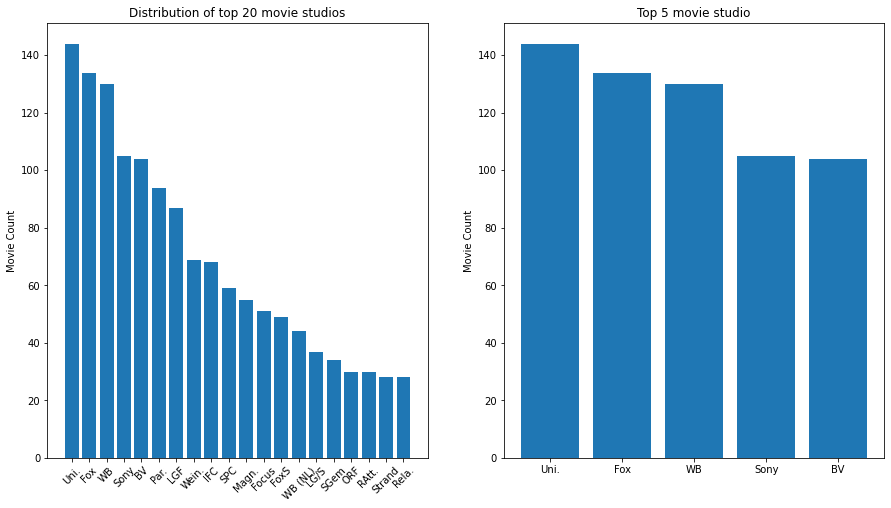

In [33]:
# Distribution of the domestic and foreign revenue per movie 
# Setting up plot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,8))

movie_count = movie_gross["studio"].value_counts()
movie_count = movie_count.iloc[:20]
top_5_counts = movie_count.iloc[:5]
# Plot data
ax1.bar(movie_count.index, movie_count.values)
ax2.bar(top_5_counts.index, top_5_counts.values)
# Customizations
ax1.tick_params(axis = "x", labelrotation = 45)
ax1.set_ylabel("Movie Count")
ax2.set_ylabel("Movie Count")
ax1.set_title("Distribution of top 20 movie studios")
ax2.set_title("Top 5 movie studio");

In [34]:
"""
The number of movies produced the studios is led by 'Uni.'- 'Universal Pictures'. 
"""

"\nThe number of movies produced the studios is led by 'Uni.'- 'Universal Pictures'. \n"

## The Numbers Dataset

In [35]:
# Movies from The Numbers
tn_movies = pd.read_csv("./tn.movie_budgets.csv")
tn_movies.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [36]:
# Data dtype description
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [37]:
# Change dtypes of columns: production_budget, domestic_gross, & worlwide_gross
tn_movies["production_budget"] = tn_movies["production_budget"].apply(lambda x: x.replace(",", "").replace("$", ""))

In [38]:
# Column: production_budget
tn_movies["production_budget"] = tn_movies["production_budget"].astype(float)
tn_movies["production_budget"].dtype

dtype('float64')

In [39]:
# Column:domestic_gross
tn_movies["domestic_gross"] = tn_movies["domestic_gross"].apply(lambda x: x.replace(",", "").replace("$", ""))

In [40]:
tn_movies["domestic_gross"] = tn_movies["domestic_gross"].astype(float)
tn_movies["domestic_gross"].dtype

dtype('float64')

In [41]:
# Column: worlwide_gross
tn_movies["worldwide_gross"] = tn_movies["worldwide_gross"].apply(lambda x: x.replace(",", "").replace("$", ""))

In [42]:
tn_movies["worldwide_gross"] = tn_movies["worldwide_gross"].astype(int)
tn_movies["worldwide_gross"].dtype

dtype('int64')

In [43]:
# Change the release_date column dtype into datetime
tn_movies["release_date"] = pd.to_datetime(tn_movies["release_date"])
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747


In [44]:
# Sorting data following worldwide_gross returns
tn_movies = tn_movies.sort_values(by="worldwide_gross", ascending=False)[:5]
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2776345279
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2208208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2048134200
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1648854864


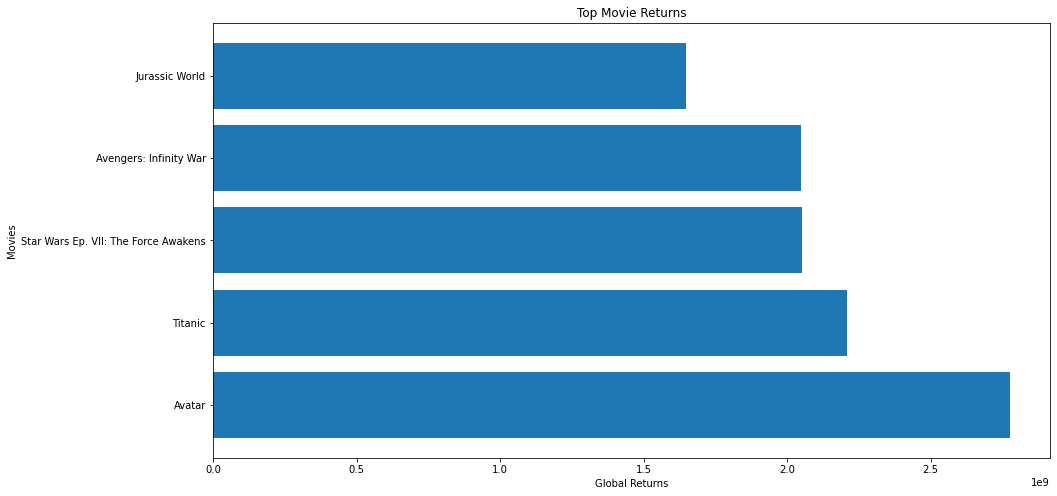

In [45]:
# Distribution of top 5 movies with their worldwide returns
fig, ax = plt.subplots(figsize = (15,8))

movie = tn_movies["movie"]
returns = tn_movies["worldwide_gross"]

ax.barh(movie, returns)
ax.set_xlabel("Global Returns")
ax.set_ylabel("Movies")
ax.set_title("Top Movie Returns");

In [46]:
"""
'Avatar'-2009- is the movie from "The Number" that has the highest global returns. The genres of these leading 
movies are: 'Avatar'-- 'Sci-fi/Action'
            'Titanic' -- 'Romance/Drama'
            'Star Wars Ep. VII: Force Awakens'-- 'Sci-fi/Adventure'
            'Avengers: Infinity War'-- 'Action/Sci-fi'
            'Jurassic World'-- 'Sci-fi'
The data above shows that the most selling mocies are of genres: -Action/Sci-fi
                                                                 -Romance/Drama
"""

'\n\'Avatar\'-2009- is the movie from "The Number" that has the highest global returns. The genres of these leading \nmovies are: \'Avatar\'-- \'Sci-fi/Action\'\n            \'Titanic\' -- \'Romance/Drama\'\n            \'Star Wars Ep. VII: Force Awakens\'-- \'Sci-fi/Adventure\'\n            \'Avengers: Infinity War\'-- \'Action/Sci-fi\'\n            \'Jurassic World\'-- \'Sci-fi\'\nThe data above shows that the most selling mocies are of genres: -Action/Sci-fi\n                                                                 -Romance/Drama\n'

## TMDB Dataset

In [47]:
# Movie descriptions from TMDB
tmdb_movies = pd.read_csv("./tmdb.movies.csv", index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [48]:
# TMDB data description
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [49]:
# Statistical analysis 
tmdb_movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [50]:
# Most popular movie
tmdb_movies[tmdb_movies["popularity"] == 80.773000]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948


In [51]:
"""
The dataset from TMDB site is clean, since it has no Null vakues, or 
wrong column dtypes
"""

'\nThe dataset from TMDB site is clean, since it has no Null vakues, or \nwrong column dtypes\n'

In [52]:
# Sorting data using popularity column
tmdb_movies = tmdb_movies.sort_values(by = "popularity", ascending = False)[:5]
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


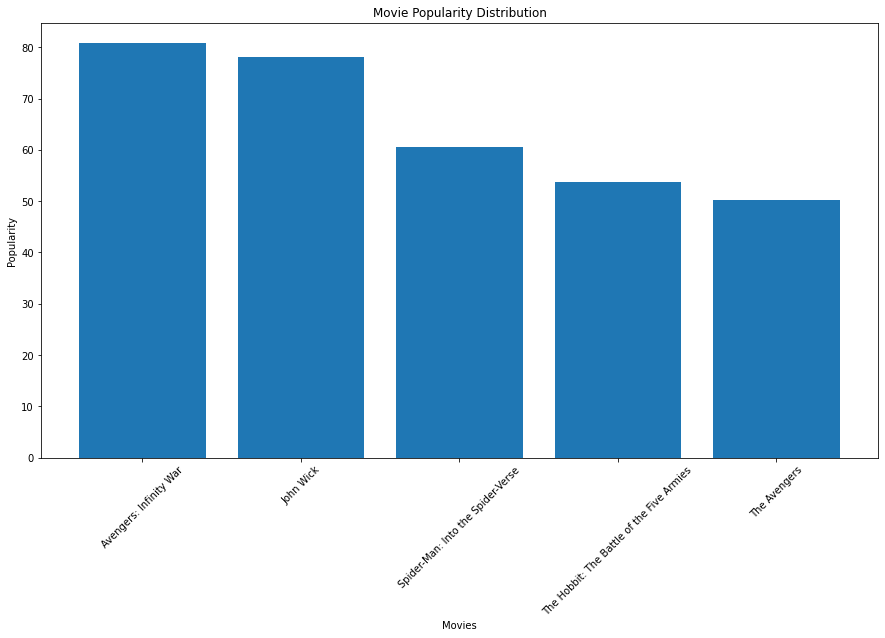

In [53]:
# Distribution of the movies as per their popularity

# Setting plot
fig, ax = plt.subplots(figsize = (15, 8))
title = tmdb_movies["title"]
popularity = tmdb_movies["popularity"]
ax.bar(title, popularity)
# Customizations
ax.set_title("Movie Popularity Distribution")
ax.set_xlabel("Movies")
ax.set_ylabel("Popularity")
ax.tick_params(axis = "x", labelrotation = 45);

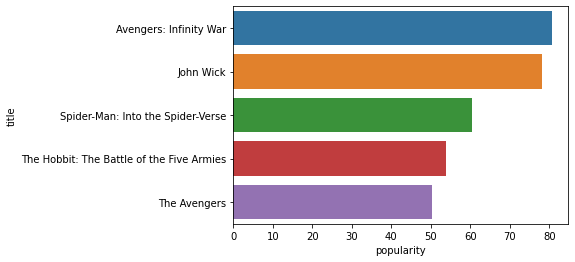

In [54]:
# Movie distribution using seaborn libraries

# Creating plot
movie = tmdb_movies["title"]
popularity = tmdb_movies["popularity"]
sns.barplot(data = tmdb_movies, x = popularity, y = movie)
sns.set_context('paper')



In [55]:
"""
The most popular movie is 'Avengers: Infinity War', with average popularity of 80.77%.
The genre id of the movie is [12,28,14] -- 'Action/Scifi'
Other movie genres are: 'John Wick' -- 'Acion/Thriller'
                        'Spider-man: Into the Spider-Verse' -- 'Family/Action'
                        'The Hobbit: The Battle of the Five Armies' -- 'Adventure/Fantasy
                        'The Avengers' -- 'Adventure/Action
The main attributes of the most popular movies is genre: 'Action' related films.
"""

"\nThe most popular movie is 'Avengers: Infinity War', with average popularity of 80.77%.\nThe genre id of the movie is [12,28,14] -- 'Action/Scifi'\nOther movie genres are: 'John Wick' -- 'Acion/Thriller'\n                        'Spider-man: Into the Spider-Verse' -- 'Family/Action'\n                        'The Hobbit: The Battle of the Five Armies' -- 'Adventure/Fantasy\n                        'The Avengers' -- 'Adventure/Action\nThe main attributes of the most popular movies is genre: 'Action' related films.\n"

## Box Office Dataset


In [56]:
# Movie ratings from Box Office
box_movies = pd.read_csv("./rt.movie_info.tsv", delimiter = "\t")
box_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [57]:
# Data description
box_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [58]:
# Dropping irrelevant columns
box_movies.drop(["currency"], axis = 1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007","33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,101 minutes,NaN


In [59]:
# Dropping Null values from columns: "id", "genre", and "synopsis"
box_movies.dropna(subset = ["id"], inplace = True)

In [60]:
box_movies.dropna(subset = ["genre"], inplace=True)
box_movies.dropna(subset = ["synopsis"], inplace = True)

In [61]:
# Assertions for columns dropped
# "id" column
assert box_movies["id"].isna().sum() == 0
# "genre" column
assert box_movies["genre"].isna().sum() == 0
# "synopsis" column
assert box_movies["synopsis"].isna().sum() == 0

In [62]:
# Changing the date data into datetime i columns: "theatre_date" and "dvd_date"
box_movies["theater_date"] = pd.to_datetime(box_movies["theater_date"])

box_movies["dvd_date"] = pd.to_datetime(box_movies["dvd_date"])

In [63]:
box_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,NaN,NaN,95 minutes,Warner Bros. Pictures


In [64]:
# Drop NaN from the studio column
box_movies.dropna(subset = ["studio"], inplace = True)
# Studio value_counts
studio_counts = box_movies["studio"].value_counts()
studio_count = studio_counts.head(5)
studio_count

Universal Pictures        35
Paramount Pictures        27
20th Century Fox          26
Sony Pictures Classics    22
Warner Bros. Pictures     21
Name: studio, dtype: int64

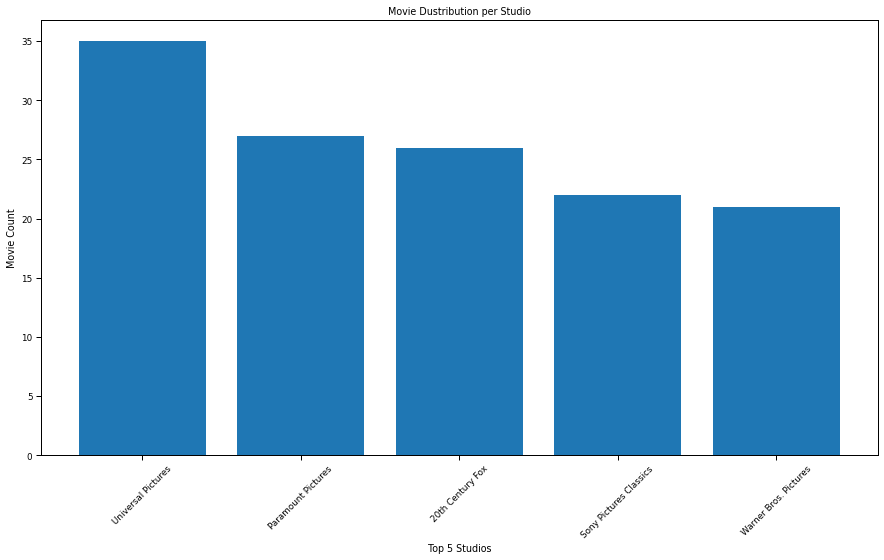

In [65]:
# Distribution of movie count per studio
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(studio_count.index, studio_count.values)

# Customizations
ax.tick_params(axis= 'x', labelrotation = 45)
ax.set_title("Movie Dustribution per Studio")
ax.set_xlabel("Top 5 Studios")
ax.set_ylabel("Movie Count");

In [66]:
"""
Universal Pictures is the leading studio in the number of movies produced, as was evident from the 'Box Office 
Mojo' dataset.
"""

"\nUniversal Pictures is the leading studio in the number of movies produced, as was evident from the 'Box Office \nMojo' dataset.\n"

## Rotten Tomatoes Dataset

In [67]:
# Movie reviews from Rotten Tomatoes
rt_movies = pd.read_csv("./rt.reviews.tsv", delimiter = "\t", encoding = "latin-1")
rt_movies.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [68]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [69]:
# Drop the "top_critic" column- irrevant
rt_movies.drop(["top_critic"], axis = 1)

,id,review,rating,fresh,critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,Filmcritic.com,"September 7, 2003"


In [70]:
# Changing dates to datetime for column: "date"
rt_movies["date"] = pd.to_datetime(rt_movies["date"])

In [71]:
# Drop Null values from the "publisher" column
rt_movies.dropna(subset = ["publisher"], inplace = True)
# Drop Null values from the "rating" column
rt_movies.dropna(subset = ["rating"], inplace = True)

In [72]:
rt_movies.sort_values(by = "rating", ascending = False)

,id,review,rating,fresh,critic,top_critic,publisher,date
47013,1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),2000-01-01
33821,1325,"Offensive in almost every way, it's the Billy ...",F-,rotten,Kent Garrison,0,Mad About Movies Podcast,2018-10-31
15286,610,"How do you say, ""I want a refund,"" in Italian?",F+,rotten,Rubin Safaya,0,Cinemalogue,2010-12-15
42352,1597,NaN,F,rotten,Owen Gleiberman,1,Entertainment Weekly,2011-09-07
6945,267,It's stupefying in its dullness and vulgarity.,F,rotten,Michael Sragow,0,Baltimore Sun,2007-09-21
...,...,...,...,...,...,...,...,...
16812,683,NaN,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,2000-01-01
36435,1418,Does the Nick Park charm work for a feature fi...,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,2000-01-01
30058,1186,Yu might as well look at the background; you a...,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,2000-01-01
13172,508,From Dusk Till Dawn will be a real disappointm...,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,2000-01-01


In [ ]:
# Next Steps